### Imports

In [2]:
import torch 
%pylab inline
plt.style.use('dark_background')

Populating the interactive namespace from numpy and matplotlib


#### Graphs below does a good job of displaying the concept but lack colors in some sense 

In [3]:
random_points = torch.normal(torch.tensor(0.),torch.tensor(2.),size=(500,500))

In [34]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

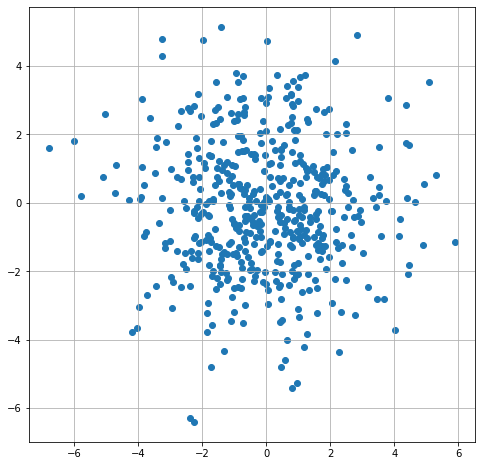

In [38]:
plt.grid()
plt.scatter(random_points[0],random_points[1])

In [52]:
activated_points = torch.sigmoid(torch.tensor(random_points))

<ipython-input-52-76e3b064b983>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  activated_points = torch.sigmoid(torch.tensor(random_points))


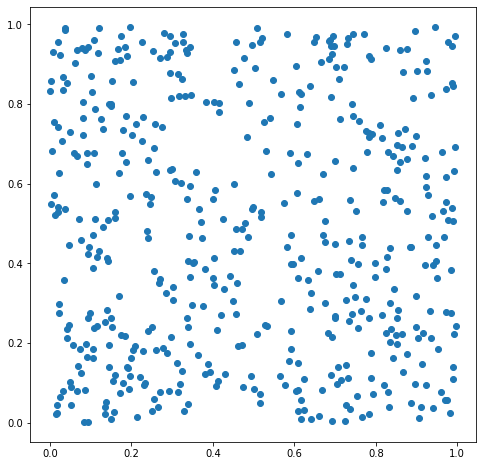

In [53]:
plt.scatter(activated_points[0],activated_points[1])

In [71]:
L1 = torch.nn.Linear(500,2)
a = L1(random_points)
xs,ys = [],[]
for i in range(len(a)):
    xs.append((a[i][0]).detach().numpy())
    ys.append((a[i][1]).detach().numpy())

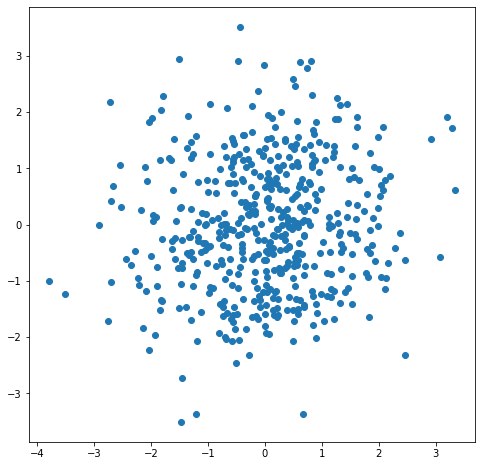

In [72]:
plt.scatter(xs,ys)

### We got colors (code below is taken from https://github.com/vivek3141/dl-visualization)

In [4]:
figsize(12,12)

In [5]:
X = torch.randn(1000, 2)
H = torch.tanh(X)

In [6]:
x_min = -1
x_max = +1
colors = (X - x_min) / (x_max - x_min)
colors =  (colors * 511).short().numpy()
colors = np.clip(colors, 0, 511)

In [7]:
zieger = plt.imread('ziegler.png')

def show_scatterplot(X, colors, title='', axis=True):
    colors = zieger[colors[:,0], colors[:,1]]
    X = X.detach().numpy()
    # plt.figure()
    plt.grid()
    plt.axis('equal')
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    # plt.grid(True)
    plt.title(title)
    _m, _c = 0, '.15'
    if axis:
        plt.axvline(0, ymin=_m, color=_c, lw=1, zorder=0)
        plt.axhline(0, xmin=_m, color=_c, lw=1, zorder=0)

### Random set of points (Our dataset for the rest of the notebook)

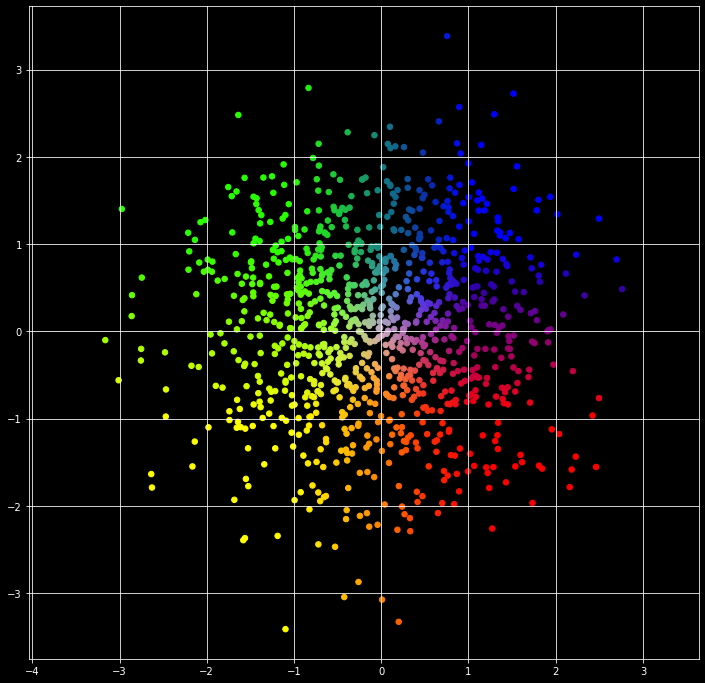

In [8]:
show_scatterplot(X,colors)

### This is what ReLU does to a set of points 

(-5.0, 5.0)

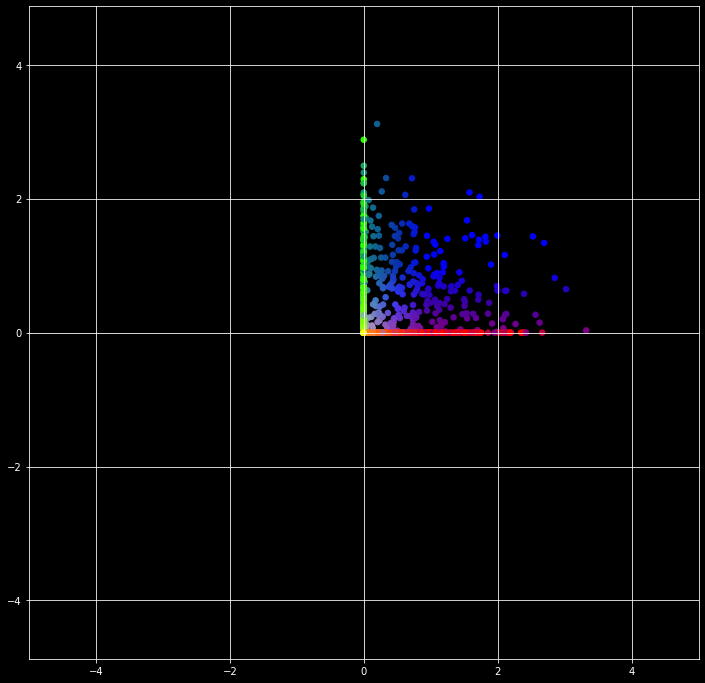

In [172]:
show_scatterplot(torch.relu(X),colors)
plt.xlim([-5, 5])
plt.ylim([-5, 5])

### A simple network of some Linear layers and some non-linear activation functions

In [33]:
L1 = torch.nn.Linear(2,2)
act1 = torch.nn.ReLU()
L2 = torch.nn.Linear(2,2)
act2 = torch.nn.ReLU()

### This is what a network does to a set of points

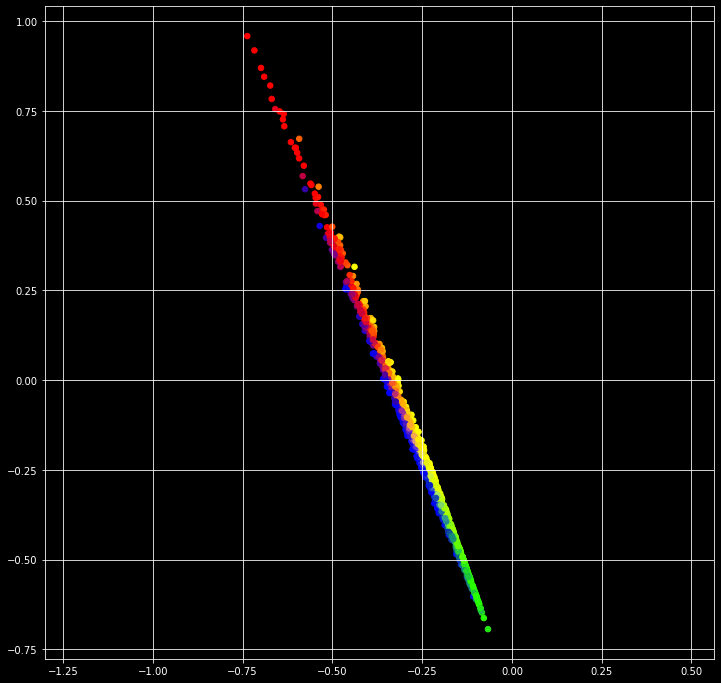

In [47]:
a = L1(X)
a = act1(a)
a = L2(a)
show_scatterplot(a,colors)
a = act2(a)

### Graphing some non-linear functions

In [39]:
L1 = torch.nn.Linear(2,2)
act1 = torch.nn.GELU()
act2 = torch.nn.ReLU()
act3 = torch.nn.Sigmoid()
a = L1(X)
gelu = act1(X)
relu = act2(X)
sigmoid = act3(X)

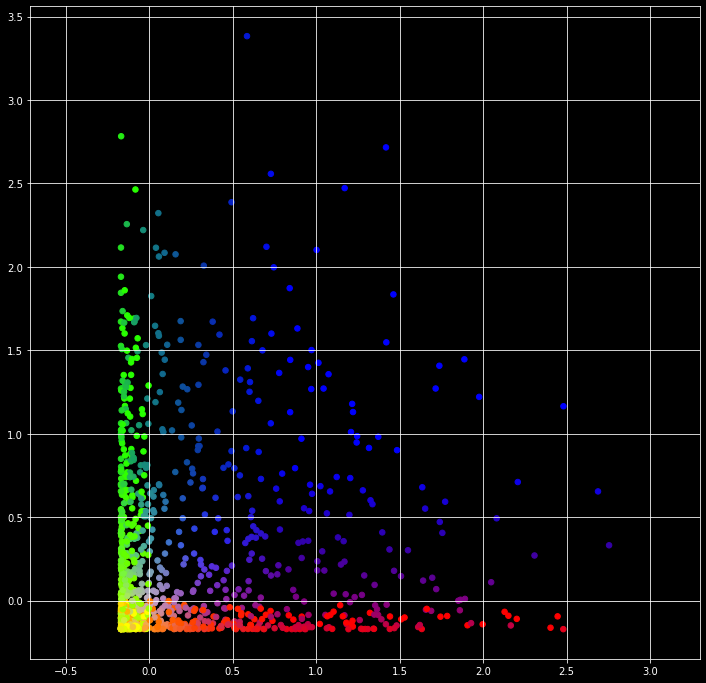

In [46]:
show_scatterplot(gelu,colors)

### Creating RiLU from Sigmoid 

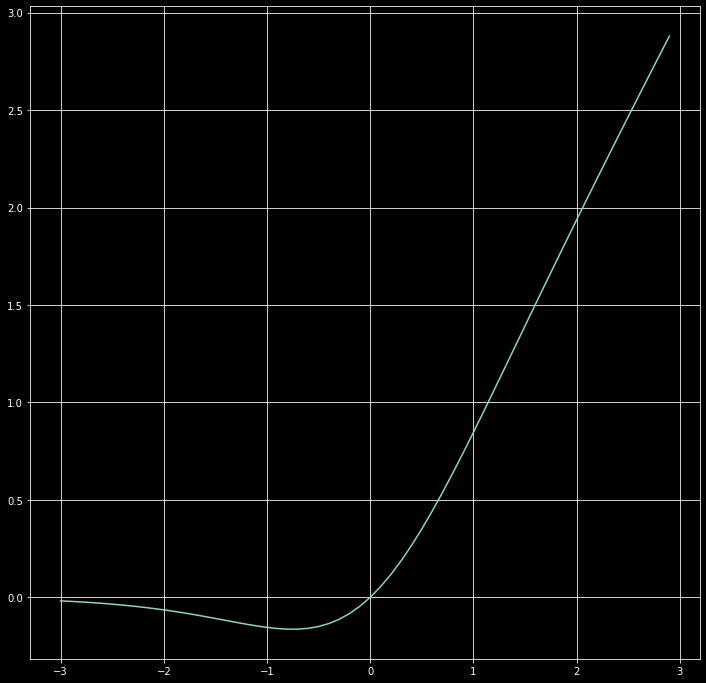

In [12]:
plt.plot(torch.arange(-3,3,.1),torch.arange(-3,3,.1)*torch.sigmoid(1.702 * torch.arange(-3,3,.1)))
plt.grid()

### This is what GELU looks like mathematically

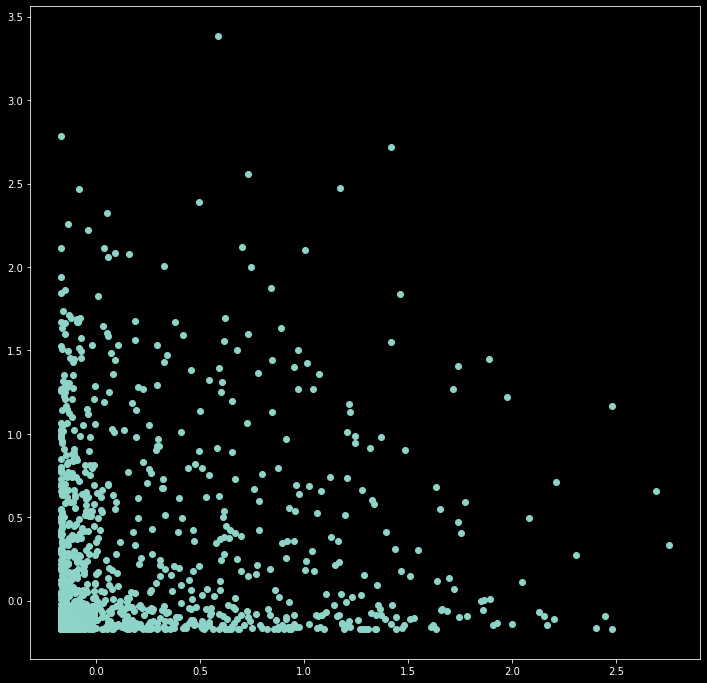

In [21]:
a = (0.5 * X * (1 + np.tanh(np.sqrt(2 / np.pi) * (X + 0.044715 * np.power(X, 3)))))
plt.scatter(a[:,0],a[:,1])

### Sigmoid Visualized 

(-1.0, 2.0)

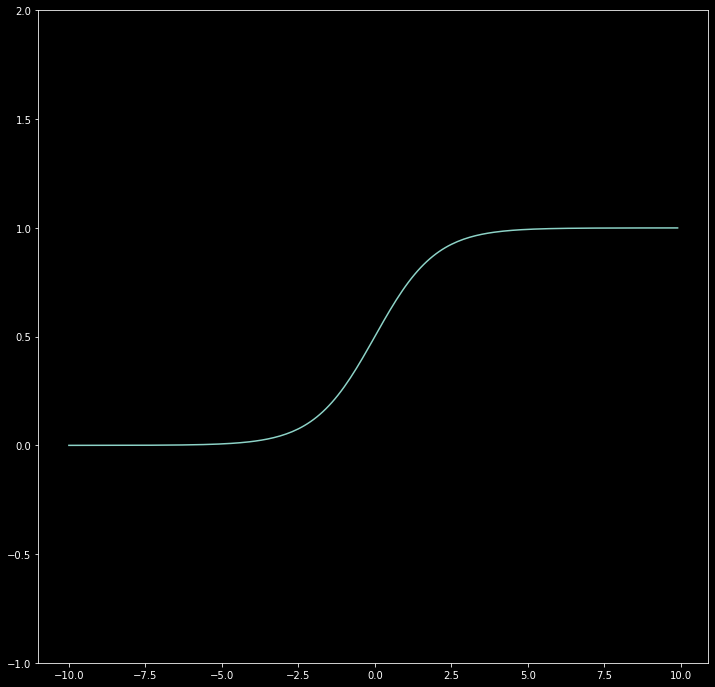

In [29]:
plt.plot(torch.tensor(np.arange(-10,10,.1)),torch.sigmoid(torch.tensor(np.arange(-10,10,.1))))
plt.ylim(-1,2)


### ReLU Visualized 

(-1.0, 2.0)

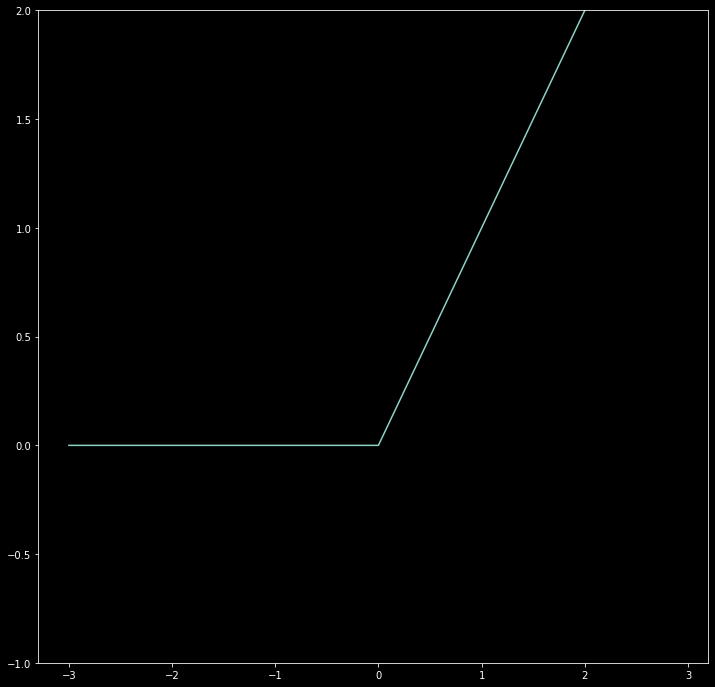

In [30]:
plt.plot(torch.arange(-3,3,.1),torch.relu(torch.arange(-3,3,.1)))
plt.ylim(-1,2)


### GELU Visualized 

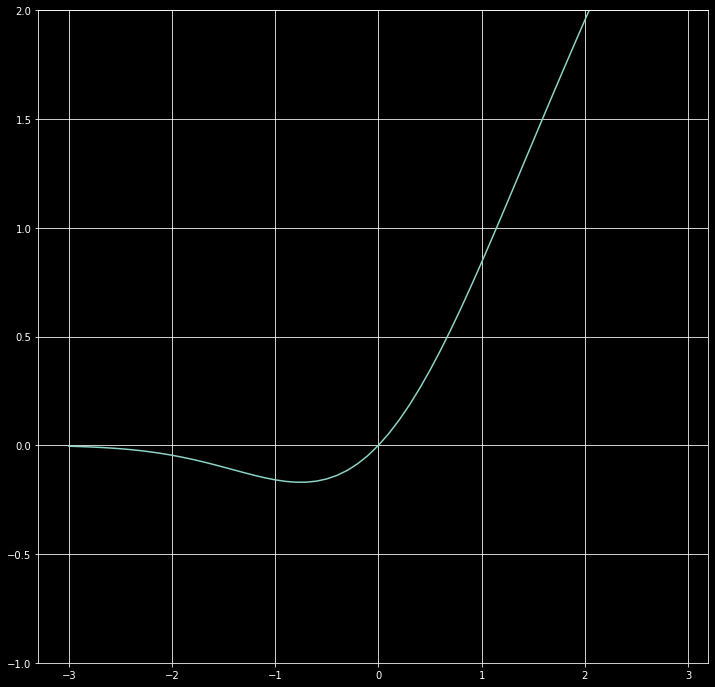

In [31]:
plt.plot(torch.arange(-3,3,.1),torch.nn.functional.gelu(torch.arange(-3,3,.1)))

plt.ylim(-1,2)
plt.grid()